## Grishma Parajuli
### Math T480 HW3

### Problem 1
9.1. (a) Run the six-line program of Experiment 1 to produce a plot of approximate Legendre polynomials.

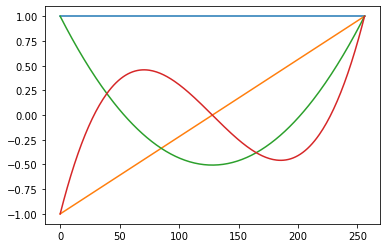

In [82]:
import numpy as np
import matplotlib.pyplot as plt

#Set a to the discretization of[-1,1]
a = np.linspace(-1, 1, 257)

#Construct Vandermonde matrix
v = np.array([a]*4).T**range(4)

#QR factorization
[q, r] = np.linalg.qr(v)

#Select last row of Q
scale = q[-1]

#rescale columns by these numbers
Q = np.dot(q, np.diag(1/scale))
plt.plot(Q)
plt.show()

b) For k = 0, l, 2, 3, plot the difference on the 257-point grid between these approximations and the exact polynomials (7.11). How big are the errors,and how are they distributed?

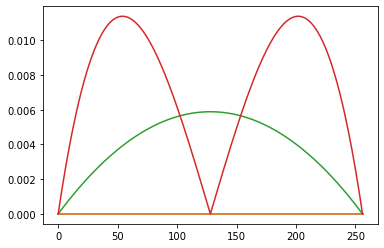

In [63]:
#polynomials 7.11
p0 = 1
p1 = a
p2 = (3/2)*a**2 - (1/2)
p3 = (5/2)*a**3 - (3/2)*a
#plotting the difference
plt.plot(range(0, 257), abs([p0]*len(range(0, 257))-Q[:,0]))
plt.plot(range(0, 257), abs(p1-Q[:,1]))
plt.plot(range(0, 257), abs(p2-Q[:,2]))
plt.plot(range(0, 257), abs(p3-Q[:,3]))
plt.show()

### Problem 2
Do problem 11.3 in your book. Don’t do all (a)-(g) as in the book, calculate the least squares coefficient vector with: (i) normal equations and a Solve command, (ii) QR factorization (iii) SVD . You may use built in routines (including to construct the Vandermonde matrix). Plot the three least squares approximations with the cos 4t function on the same graph to see how good the fit is.

Take m = 50, n = 12. Using MATLAB's linspace, define t to be the m-vector corresponding to linearly spaced grid points from 0 to 1. Using MATLAB's vander and fliplr , define A to be the m x n matrix associated with least squares fitting on this grid by a polynomial of degree n - 1. Take b to be the function cos(4t) evaluated on the grid. Now, calculate and print (to sixteen-digit precision) the least squares coefficient vector x by six methods:

In [64]:
#built-in Vandermonde
m = 50
n= 12
t = np.linspace(0,1,m)
#Creating a Vandermonde matrix
A =np.vander(t, n, increasing= 'TRUE')

b = np.cos(4*t.T)
print(b)

[ 1.          0.9966699   0.9867018   0.97016207  0.94716088  0.91785141
  0.88242889  0.84112921  0.79422746  0.742036    0.68490244  0.6232073
  0.55736148  0.48780353  0.41499671  0.33942593  0.26159452  0.18202083
  0.10123485  0.01977463 -0.0618173  -0.14299751 -0.22322532 -0.30196642
 -0.37869636 -0.45290412 -0.52409544 -0.59179619 -0.65555547 -0.71494862
 -0.76958007 -0.81908598 -0.86313662 -0.9014386  -0.93373683 -0.9598162
 -0.97950301 -0.99266614 -0.99921793 -0.99911473 -0.99235724 -0.97899047
 -0.95910343 -0.93282858 -0.90034091 -0.8618568  -0.81763256 -0.76796273
 -0.71317813 -0.65364362]


In [79]:
#normal equation
B = np.dot(A.transpose(), A)
Bv= np.dot(A.transpose(),b)
norm_eq = np.linalg.solve(B, Bv)
print(norm_eq)

[ 9.99999996e-01  1.04022684e-06 -8.00003783e+00  5.32702533e-04
  1.06628060e+01  1.64680905e-02 -5.73387920e+00  8.50955487e-02
  1.50260458e+00  1.47570865e-01 -4.33615483e-01  9.88100741e-02]


In [80]:
#QR factorization
Q, R = np.linalg.qr(A)
x = np.dot(Q.transpose(), b)
qr = np.linalg.solve(R,x)
print(qr)

[ 1.00000000e+00 -4.22743497e-07 -7.99998124e+00 -3.18763393e-04
  1.06694308e+01 -1.38202922e-02 -5.64707562e+00 -7.53160419e-02
  1.69360698e+00  6.03209554e-03 -3.74241698e-01  8.80405752e-02]


In [101]:
#svd
u, s, vt = np.linalg.svd(A, 0)

c = np.dot(u.transpose(), b)

w = np.linalg.solve(np.diag(s), c)
svd = np.dot(vt.transpose(),w)
print(svd)

[ 1.00000000e+00 -4.22743486e-07 -7.99998124e+00 -3.18763396e-04
  1.06694308e+01 -1.38202923e-02 -5.64707562e+00 -7.53160427e-02
  1.69360698e+00  6.03209483e-03 -3.74241698e-01  8.80405751e-02]


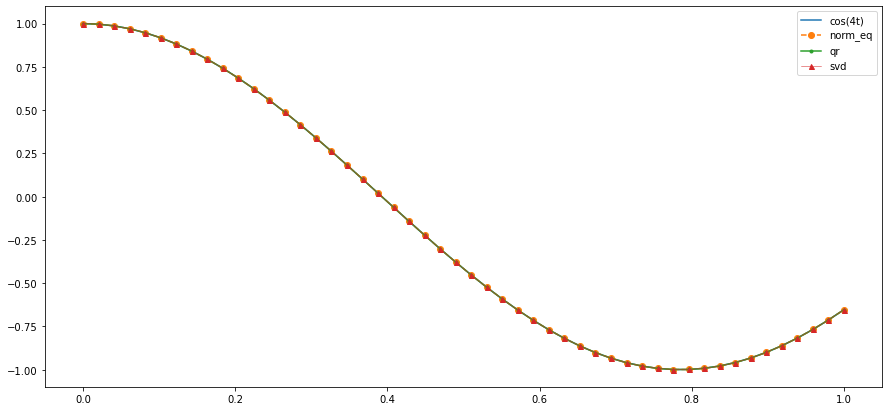

In [126]:
#plot
plt.figure(figsize=(15, 7))
plt.plot(t,b, label = "cos(4t)")
plt.plot(t,np.dot(A,norm_eq), label = "norm_eq", marker='o', linestyle='dashed')
plt.plot(t,np.dot(A,qr), label= "qr", marker='.')
plt.plot(t,np.dot(A,svd), label ="svd",marker='^',linewidth=0.5, markersize=5)
plt.legend()
plt.show()